_This notebook will be used for the Capstone project of the IBM Data Science Professional Certificate._

# Building a Travel Suggestion Scorecard

## Step1: Data Collection of Capital Cities and their Coordinates

In [2]:
import pandas as pd
import numpy as np
import re

In [4]:
url='https://lab.lmnixon.org/4th/worldcapitals.html'
tbl=pd.read_html(url, header=0)
capital_coords=tbl[0][0:200]
capital_coords.head()

,Country,Capital,Latitude,Longitude
0,Afghanistan,Kabul,34.28N,69.11E
1,Albania,Tirane,41.18N,19.49E
2,Algeria,Algiers,36.42N,03.08E
3,American Samoa,Pago Pago,14.16S,170.43W
4,Andorra,Andorra la Vella,42.31N,01.32E


In [5]:
#Strip to get N/S and E/W for determining the sign later on
lat_direction=capital_coords['Latitude'].str[-1]
long_direction=capital_coords['Longitude'].str[-1]

In [6]:
#get number on coordinates only
lat_value=capital_coords['Latitude'].str[0:5]
long_value=capital_coords['Longitude'].str[0:5]
#create new columns
capital_coords['lat_direction']=lat_direction
capital_coords['long_direction']=long_direction
capital_coords['lat_value']=lat_value
capital_coords['long_value']=long_value
# change lat and long values to float from object
capital_coords['lat_value']=capital_coords['lat_value'].astype('float')
capital_coords['long_value']=capital_coords['long_value'].astype('float')
capital_coords.dtypes

C:\Users\Acer\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Acer\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Acer\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

Country            object
Capital            object
Latitude           object
Longitude          object
lat_direction      object
long_direction     object
lat_value         float64
long_value        float64
dtype: object

In [7]:
#create multipliers
capital_coords['lat_multiplier']=capital_coords['lat_direction'].apply(lambda x: 1 if x=='N' else -1)
capital_coords['long_multiplier']=capital_coords['long_direction'].apply(lambda x: 1 if x=='E' else -1)

C:\Users\Acer\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Acer\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
#multiply
capital_coords['lat']=capital_coords['lat_value'].multiply(capital_coords['lat_multiplier'])
capital_coords['long']=capital_coords['long_value'].multiply(capital_coords['long_multiplier'])

C:\Users\Acer\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Acer\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
coords=capital_coords[['Country','Capital','lat','long']]
coords.head()

,Country,Capital,lat,long
0,Afghanistan,Kabul,34.28,69.11
1,Albania,Tirane,41.18,19.49
2,Algeria,Algiers,36.42,3.08
3,American Samoa,Pago Pago,-14.16,-170.40
4,Andorra,Andorra la Vella,42.31,1.32


In [10]:
#save as csv so we can call this later
coords.to_csv("capital_coords.csv")

## Step2: Data Collection of Happiness Index

In [11]:
url='https://en.wikipedia.org/wiki/World_Happiness_Report'
tbl=pd.read_html(url, header=0)
hap_index=tbl[6]
hap_index.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [12]:
#save as csv so we can call this later
hap_index.to_csv("happiness_index.csv")

## Step3: Data Collection from Foursquare on TopVenues for each Country

In [13]:
import requests
import json

In [14]:
coords=pd.read_csv("capital_coords.csv",index_col=0)
coords.head()

,Country,Capital,lat,long
0,Afghanistan,Kabul,34.28,69.11
1,Albania,Tirane,41.18,19.49
2,Algeria,Algiers,36.42,3.08
3,American Samoa,Pago Pago,-14.16,-170.40
4,Andorra,Andorra la Vella,42.31,1.32


In [16]:
CLIENT_ID = 'A2Y0GH2SUYTTVLDESYA12MBQCMXTPMPPQR3BCO1GAWYNNQ1B' # your Foursquare ID
CLIENT_SECRET = '0E0U5OVTVY1QUKNIC0KM0LVKN0PKVLWMFZXR2VLGI45YC2DX' # your Foursquare Secret
VERSION = '20200619' # Foursquare API version
LIMIT=50 #set limit to top50 venues

In [17]:
def getNearbyVenues(names, latitudes, longitudes, radius=100000): #max possible radius
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        try:
            results = requests.get(url).json()["response"]['groups'][0]['items']
        except:
            pass
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [18]:
top50_venues = getNearbyVenues(names=coords['Capital'],
                                   latitudes=coords['lat'],
                                   longitudes=coords['long']
                                  )

Kabul
Tirane
Algiers
Pago Pago
Andorra la Vella
Luanda
West Indies
Buenos Aires
Yerevan
Oranjestad
Canberra
Vienna
Baku
Nassau
Manama
Dhaka
Bridgetown
Minsk
Brussels
Belmopan
Porto Novo (constitutional) / Cotonou (seat of government)
Thimphu
La Paz (administrative) / Sucre (legislative)
Sarajevo
Gaborone
Brasilia
Road Town
Bandar Seri Begawan
Sofia
Ouagadougou
Bujumbura
Phnom Penh
Yaounde
Ottawa
Praia
George Town
Bangui
N'Djamena
Santiago
Beijing
Bogota
Moroni
Brazzaville
San Jose
Yamoussoukro
Zagreb
Havana
Nicosia
Prague
Kinshasa
Copenhagen
Djibouti
Roseau
Santo Domingo
Dili
Quito
Cairo
San Salvador
Malabo
Asmara
Tallinn
Addis Ababa
Stanley
Torshavn
Suva
Helsinki
Paris
Cayenne
Papeete
Libreville
Banjul
T'bilisi
Berlin
Accra
Athens
Nuuk
Basse-Terre
Guatemala
St. Peter Port
Conakry
Bissau
Georgetown
Port-au-Prince
nan
Tegucigalpa
Budapest
Reykjavik
New Delhi
Jakarta
Tehran
Baghdad
Dublin
Jerusalem
Rome
Kingston
Amman
Astana
Nairobi
Tarawa
Kuwait
Bishkek
Vientiane
Riga
Beirut
Maseru
Monr

In [19]:
print(top50_venues.shape)
top50_venues.head()

(8076, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Kabul,34.28,69.11,CIANO KAIA,34.570441,69.216922,Italian Restaurant
1,Kabul,34.28,69.11,Kabul Serena Hotel,34.520398,69.177970,Hotel
2,Kabul,34.28,69.11,KAIA Gym,34.571136,69.220850,Gym
3,Kabul,34.28,69.11,Park Star Hotel,34.530622,69.165643,Hotel
4,Kabul,34.28,69.11,Barg Continental,34.534441,69.170974,Afghan Restaurant


In [20]:
top50_venues.rename(columns={'Neighborhood':'Capital'},inplace=True)
top50_venues.rename(columns={'Neighborhood Latitude':'Latitude','Neighborhood Longitude':'Longitude'},inplace=True)
top50_venues=top50_venues.merge(coords[['Country','Capital']],on='Capital',how='left')
fixed_columns = [top50_venues.columns[-1]] + list(top50_venues.columns[:-1])
top50_venues=top50_venues[fixed_columns]
top50_venues.head()

,Country,Capital,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Afghanistan,Kabul,34.28,69.11,CIANO KAIA,34.570441,69.216922,Italian Restaurant
1,Afghanistan,Kabul,34.28,69.11,Kabul Serena Hotel,34.520398,69.177970,Hotel
2,Afghanistan,Kabul,34.28,69.11,KAIA Gym,34.571136,69.220850,Gym
3,Afghanistan,Kabul,34.28,69.11,Park Star Hotel,34.530622,69.165643,Hotel
4,Afghanistan,Kabul,34.28,69.11,Barg Continental,34.534441,69.170974,Afghan Restaurant


In [21]:
len(top50_venues['Venue Category'].unique())
#There are 419 unique categories. These are too many.

419

In [22]:
#save as csv so we can call this later
top50_venues.to_csv("top50_venues.csv")

## Step 4: Reducing the Number of Categories

_This is the most manual part of my code and was time consuming. I'm not proud of it but I couldn't think of a better way._

In [23]:
import pandas as pd
import numpy as np
import re
top50_venues=pd.read_csv("top50_venues.csv",index_col=0)
top50_venues.head()

,Country,Capital,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Afghanistan,Kabul,34.28,69.11,CIANO KAIA,34.570441,69.216922,Italian Restaurant
1,Afghanistan,Kabul,34.28,69.11,Kabul Serena Hotel,34.520398,69.177970,Hotel
2,Afghanistan,Kabul,34.28,69.11,KAIA Gym,34.571136,69.220850,Gym
3,Afghanistan,Kabul,34.28,69.11,Park Star Hotel,34.530622,69.165643,Hotel
4,Afghanistan,Kabul,34.28,69.11,Barg Continental,34.534441,69.170974,Afghan Restaurant


In [24]:
# Clean up categories
top50_venues['Venue Category']=top50_venues['Venue Category'].str.replace(r"[A-z]+ Restaurant","Restaurant")
top50_venues['Venue Category']=top50_venues['Venue Category'].str.lower()
print('unique venue categories:', len(top50_venues['Venue Category'].unique()))

unique venue categories: 352


In [25]:
# words to associate
restaurant=['pizza','burger','sandwich','bbq','noodle','soup','hot dog','buffet','diner','osteria','fish','burrito','taco','restaurant','steak','chicken','wings','salad','food','snack','breakfast','brasserie','cafeteria']
cafe_desserts=['cafe','café','bakery','coffee','ice cream','pastry','juice','tea','creperie','candy','bagel','pastry,''chocolate','pie','yogurt','cupcake','cake','donut','dessert']
alc_bev=['pub','wine','vin','speakeasy','nightlife','liquor','club','cocktail','lounge','bistro','whisky','beer','brewery','bar','distillery']
grocery=['market','grocery','gourmet','deli','fruit & vegetable']
fitness=['gym','fitness','pool','tennis','basketball','golf','soccer','track','bowling','hockey']
amusement_cultural=['theater','arts','historic','museum','opera','art','cultural','monument']
amusement_nature=['ski','trail','park','garden','zoo','mountain','beach','resort','forest','surf','harbor','scenic','outdoors','tree','dive','outdoor','waterfall']
entertainment=['movie','game','music','shopping','plaza','stadium','entertainment','recreation','concert','video']

In [26]:
to_replace_restau=[s for s in top50_venues['Venue Category'].unique() if any(i in s for i in restaurant)]
to_replace_cafe=[s for s in top50_venues['Venue Category'].unique() if any(i in s for i in cafe_desserts)]
to_replace_alcbev=[s for s in top50_venues['Venue Category'].unique() if any(i in s for i in alc_bev)]
to_replace_groc=[s for s in top50_venues['Venue Category'].unique() if any(i in s for i in grocery)]
to_replace_fitness=[s for s in top50_venues['Venue Category'].unique() if any(i in s for i in fitness)]
to_replace_amuse1=[s for s in top50_venues['Venue Category'].unique() if any(i in s for i in amusement_cultural)]
to_replace_amuse2=[s for s in top50_venues['Venue Category'].unique() if any(i in s for i in amusement_nature)]
to_replace_entertainment=[s for s in top50_venues['Venue Category'].unique() if any(i in s for i in entertainment)]

In [27]:
top50_venues['Venue Category']=top50_venues['Venue Category'].replace(to_replace_restau,'restaurant')
top50_venues['Venue Category']=top50_venues['Venue Category'].replace(to_replace_cafe,'cafe/desserts')
top50_venues['Venue Category']=top50_venues['Venue Category'].replace(to_replace_alcbev,'alc_bev')
top50_venues['Venue Category']=top50_venues['Venue Category'].replace(to_replace_groc,'grocery')
top50_venues['Venue Category']=top50_venues['Venue Category'].replace(to_replace_fitness,'fitness')
top50_venues['Venue Category']=top50_venues['Venue Category'].replace(to_replace_amuse1,'amusement_cultural')
top50_venues['Venue Category']=top50_venues['Venue Category'].replace(to_replace_amuse2,'amusement_nature')
top50_venues['Venue Category']=top50_venues['Venue Category'].replace(to_replace_entertainment,'entertainment')

In [28]:
print('unique venue categories:', len(top50_venues['Venue Category'].unique()))

unique venue categories: 154


In [30]:
#Top 15 categories based on total count
top15_list=top50_venues.groupby('Venue Category').count().sort_values(by='Country',ascending=False)[0:15].index
top15_list

Index(['restaurant', 'cafe/desserts', 'amusement_nature', 'alc_bev', 'hotel',
       'amusement_cultural', 'entertainment', 'fitness', 'grocery',
       'bookstore', 'spa', 'airport', 'multiplex', 'castle', 'hostel'],
      dtype='object', name='Venue Category')

## Step 5: Create Matrix of Count (Nominal Count and Scaled)

In [32]:
# Switch to Matrix of Counts
top50_onehot=pd.get_dummies(top50_venues[['Venue Category']],prefix="",prefix_sep="")

#Add Country column
top50_onehot['Country'] = top50_venues['Country']

# move Country column to the first column
fixed_columns = [top50_onehot.columns[-1]] + list(top50_onehot.columns[:-1])
top50_onehot = top50_onehot[fixed_columns]
top50_onehot.head()

,Country,accessories store,airport,airport gate,airport service,airport terminal,alc_bev,amusement_cultural,amusement_nature,aquarium,...,tourist information center,town,train station,university,used bookstore,village,volcano,warehouse store,waterfront,yoga studio
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Afghanistan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Afghanistan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Afghanistan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Afghanistan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
# Group by country, get totals
venues_grouped=top50_onehot.groupby("Country").sum().reset_index()

#get countries with at least 30 venues listed
venues_grouped=venues_grouped[venues_grouped.sum(axis=1)>=30]
venues_grouped.head()

,Country,accessories store,airport,airport gate,airport service,airport terminal,alc_bev,amusement_cultural,amusement_nature,aquarium,...,tourist information center,town,train station,university,used bookstore,village,volcano,warehouse store,waterfront,yoga studio
1,Albania,0,0,0,0,0,9,2,4,0,...,0,0,0,0,0,0,0,0,0,0
2,Algeria,0,0,0,0,0,2,4,3,0,...,0,0,0,0,0,0,0,0,0,0
4,Andorra,0,0,0,0,0,4,1,19,0,...,0,1,0,0,0,0,0,0,0,0
5,Angola,0,0,0,0,0,3,2,3,0,...,0,0,0,0,0,0,0,1,0,0
6,Antigua and Barbuda,0,0,0,0,0,2,0,13,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
#Create csv file for easy use later
venues_grouped.to_csv("CapitalCities with at least 30 top venues_Nominal Count.csv")

In [36]:
#Normalize top venues
for_scaling=venues_grouped.set_index("Country")
venues_grouped_scaled=for_scaling.div(for_scaling.sum(axis=1),axis=0)
venues_grouped_scaled.reset_index(inplace=True)
venues_grouped_scaled.to_csv("CapitalCities with at least 30 top venues_Scaled.csv")

## Step 6: Univariate Analysis (Plot and Correlation)

Check if the distribution of venue categories has any impact on happiness.

In [43]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [41]:
venues_scaled=pd.read_csv("CapitalCities with at least 30 top venues_Scaled.csv",index_col=0)
happiness=pd.read_csv("happiness_index.csv",index_col=0)[['Country or region','Score']]
happiness.columns=['Country','HI']
merged=happiness.merge(venues_scaled,on='Country')
merged.head()

,Country,HI,accessories store,airport,airport gate,airport service,airport terminal,alc_bev,amusement_cultural,amusement_nature,...,tourist information center,town,train station,university,used bookstore,village,volcano,warehouse store,waterfront,yoga studio
0,Finland,7.632,0.0,0.0,0.0,0.0,0.0,0.10,0.06,0.08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02,0.02
1,Norway,7.594,0.0,0.0,0.0,0.0,0.0,0.18,0.04,0.20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00
2,Denmark,7.555,0.0,0.0,0.0,0.0,0.0,0.18,0.10,0.24,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00
3,Iceland,7.495,0.0,0.0,0.0,0.0,0.0,0.14,0.02,0.08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00
4,Switzerland,7.487,0.0,0.0,0.0,0.0,0.0,0.10,0.06,0.30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02,0.00


In [42]:
#Top Categories obtained in previous notebook
top_categories=top15_list
top_categories

Index(['restaurant', 'cafe/desserts', 'amusement_nature', 'alc_bev', 'hotel',
       'amusement_cultural', 'entertainment', 'fitness', 'grocery',
       'bookstore', 'spa', 'airport', 'multiplex', 'castle', 'hostel'],
      dtype='object', name='Venue Category')

In [44]:
# Correlation Loop
correlations=[]
for category in top_categories:
    corr,_=pearsonr(merged['HI'],merged[category])
    correlations.append([category,corr])
correlations=pd.DataFrame(correlations)
correlations.columns=['Venue Category','Correlation with HI']
correlations

,Venue Category,Correlation with HI
0,restaurant,-0.406501
1,cafe/desserts,0.145805
2,amusement_nature,0.349484
3,alc_bev,0.028303
4,hotel,-0.490189
5,amusement_cultural,0.226268
6,entertainment,-0.146013
7,fitness,0.011613
8,grocery,0.112568
9,bookstore,0.177417


None of the correlations above are particularly high or low.

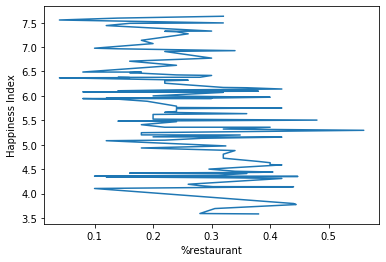

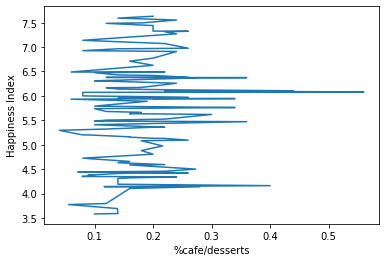

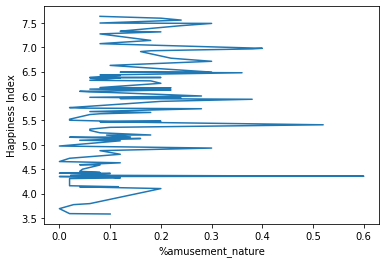

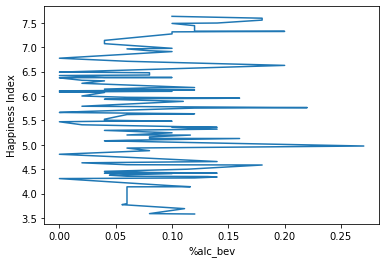

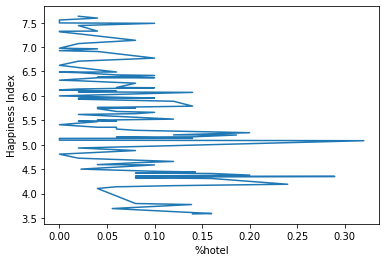

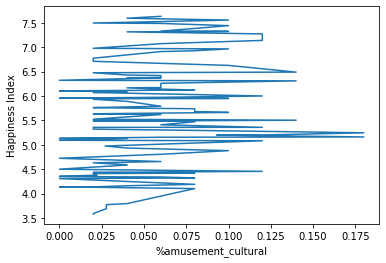

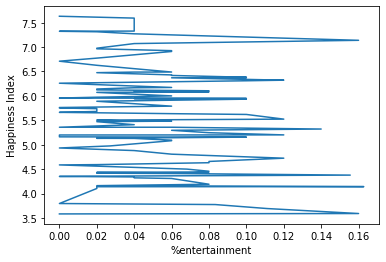

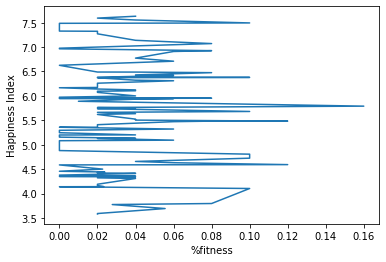

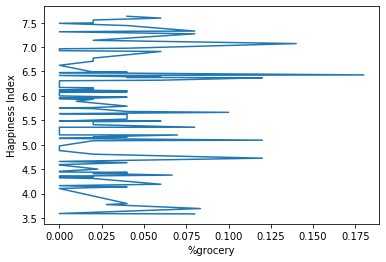

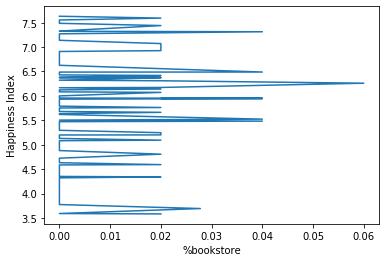

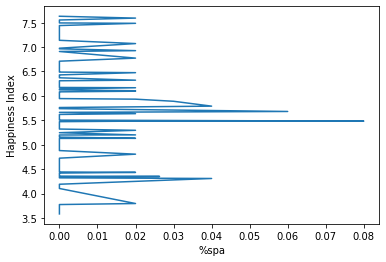

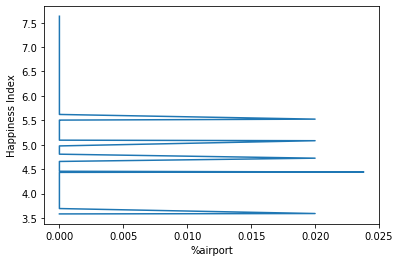

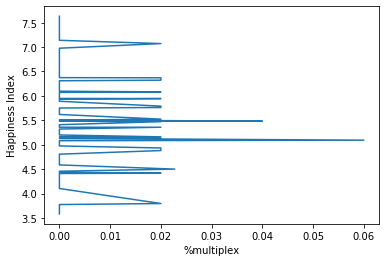

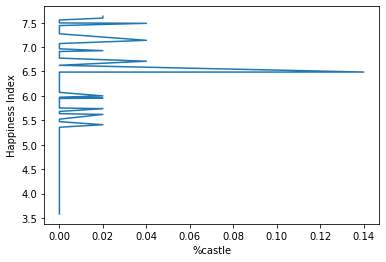

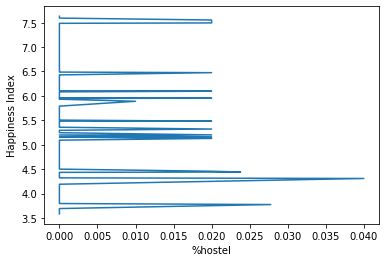

In [45]:
for category in top_categories:
    plt.figure()
    plt.plot(merged[category],merged['HI'])
    plt.xlabel('%' + category)
    plt.ylabel('Happiness Index')
plt.show()

No relationship can be observed from the plots.

## Step 7: K-means Clustering

Cluster using nominal count of venue categories per country.

In [46]:
from sklearn.cluster import KMeans

In [96]:
venues_grouped=pd.read_csv("CapitalCities with at least 30 top venues_Nominal Count.csv", index_col=0)

# set number of clusters, womt cluster into 5.
kclusters = 4
country_clustering = venues_grouped.drop('Country', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(country_clustering)

# add cluster labels
venues_grouped.insert(0, 'Cluster Labels', kmeans.labels_)
venues_grouped.head()

,Cluster Labels,Country,accessories store,airport,airport gate,airport service,airport terminal,alc_bev,amusement_cultural,amusement_nature,...,tourist information center,town,train station,university,used bookstore,village,volcano,warehouse store,waterfront,yoga studio
1,0,Albania,0,0,0,0,0,9,2,4,...,0,0,0,0,0,0,0,0,0,0
2,0,Algeria,0,0,0,0,0,2,4,3,...,0,0,0,0,0,0,0,0,0,0
4,2,Andorra,0,0,0,0,0,4,1,19,...,0,1,0,0,0,0,0,0,0,0
5,0,Angola,0,0,0,0,0,3,2,3,...,0,0,0,0,0,0,0,1,0,0
6,0,Antigua and Barbuda,0,0,0,0,0,2,0,13,...,0,0,0,0,0,0,0,0,0,0


In [97]:
#combine cluster labels with happiness index
clustered_countries=happiness.merge(venues_grouped[['Cluster Labels','Country']],on='Country')
clustered_countries.head()

,Country,HI,Cluster Labels
0,Finland,7.632,0
1,Norway,7.594,2
2,Denmark,7.555,2
3,Iceland,7.495,0
4,Switzerland,7.487,2


In [98]:
clustered_countries['Cluster Labels'].unique()

array([0, 2, 3, 1])

## Step 8: T-test to Check Differences in Happiness Index(HI) Means

In [55]:
from scipy.stats import ttest_ind
from scipy import stats
import numpy as np

In [99]:
p_val=pd.DataFrame()
for i in range(0,4):
    for j in range(0,4):
        t_stat,p_value=ttest_ind(clustered_countries[clustered_countries['Cluster Labels']==i]['HI'],clustered_countries[clustered_countries['Cluster Labels']==j]['HI'])
        p_val.loc[i,j]=p_value
p_val.columns=[1,2,3,4]
p_val.index=[1,2,3,4]
p_val

,1,2,3,4
1,1.000000,0.941399,0.004050,0.016212
2,0.941399,1.000000,0.003849,0.016724
3,0.004050,0.003849,1.000000,0.354098
4,0.016212,0.016724,0.354098,1.000000


## Step 9: Check Resulting Clustered Countries

In [100]:
venues_grouped=pd.read_csv("CapitalCities with at least 30 top venues_Nominal Count.csv",index_col=0)

In [101]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [102]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Country']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind])) #for 1-3
    except:
        columns.append('{}th Most Common Venue'.format(ind+1)) #for 4 and 5

# create a new dataframe
venues_sorted = pd.DataFrame(columns=columns)
# fill in Neighborhood column
venues_sorted['Country'] = venues_grouped['Country']

# fill in output of function per row
for ind in np.arange(venues_grouped.shape[0]):
    venues_sorted.iloc[ind, 1:] = return_most_common_venues(venues_grouped.iloc[ind, :], num_top_venues)

venues_sorted.head()

,Country,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1,Albania,restaurant,alc_bev,cafe/desserts,hotel,amusement_nature
2,Algeria,restaurant,hotel,amusement_cultural,amusement_nature,entertainment
4,Andorra,amusement_nature,restaurant,alc_bev,cafe/desserts,hotel
5,Angola,restaurant,cafe/desserts,hotel,fitness,alc_bev
6,Antigua and Barbuda,restaurant,amusement_nature,cafe/desserts,hotel,fitness


In [103]:
group=clustered_countries.merge(venues_sorted,on='Country')
group.head()

,Country,HI,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Finland,7.632,0,restaurant,cafe/desserts,alc_bev,amusement_nature,amusement_cultural
1,Norway,7.594,2,amusement_nature,alc_bev,cafe/desserts,restaurant,grocery
2,Denmark,7.555,2,amusement_nature,cafe/desserts,alc_bev,amusement_cultural,restaurant
3,Iceland,7.495,0,restaurant,cafe/desserts,alc_bev,fitness,amusement_nature
4,Switzerland,7.487,2,amusement_nature,restaurant,cafe/desserts,hotel,alc_bev


#### Cluster 1

In [104]:
cluster1=group[group['Cluster Labels']==0]
print('# of members:', cluster1.shape[0])
print('average happiness index:', cluster1['HI'].mean())
cluster1
# average happiness, lots of restaurants, cafes/dessert places, and places that serve alcohol

# of members: 33
average happiness index: 5.2920606060606055


,Country,HI,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Finland,7.632,0,restaurant,cafe/desserts,alc_bev,amusement_nature,amusement_cultural
3,Iceland,7.495,0,restaurant,cafe/desserts,alc_bev,fitness,amusement_nature
6,Canada,7.328,0,restaurant,cafe/desserts,amusement_nature,alc_bev,grocery
14,Belgium,6.927,0,restaurant,amusement_nature,cafe/desserts,fitness,alc_bev
31,Slovakia,6.173,0,restaurant,cafe/desserts,alc_bev,amusement_nature,hotel
32,El Salvador,6.167,0,restaurant,amusement_nature,cafe/desserts,hotel,alc_bev
33,Nicaragua,6.141,0,restaurant,cafe/desserts,amusement_cultural,amusement_nature,clothing store
36,Uzbekistan,6.096,0,restaurant,cafe/desserts,alc_bev,hotel,entertainment
40,Ecuador,5.973,0,restaurant,cafe/desserts,hotel,alc_bev,amusement_nature
43,Slovenia,5.948,0,restaurant,cafe/desserts,amusement_nature,entertainment,alc_bev


#### Cluster 2

In [105]:
cluster2=group[group['Cluster Labels']==1]
print('# of members:', cluster2.shape[0])
print('average happiness index:', cluster2['HI'].mean())
cluster2

# average happiness index, lots of restaurants and hotels

# of members: 29
average happiness index: 5.310999999999999


,Country,HI,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
10,Austria,7.139,1,amusement_nature,restaurant,entertainment,amusement_cultural,hotel
16,United Arab Emirates,6.774,1,restaurant,amusement_nature,cafe/desserts,hotel,fitness
22,Panama,6.430,1,restaurant,grocery,cafe/desserts,amusement_nature,alc_bev
23,Brazil,6.419,1,restaurant,cafe/desserts,amusement_nature,hotel,fitness
25,Uruguay,6.379,1,amusement_nature,restaurant,cafe/desserts,fitness,alc_bev
28,Malaysia,6.322,1,restaurant,cafe/desserts,entertainment,grocery,amusement_nature
29,Spain,6.310,1,restaurant,amusement_nature,amusement_cultural,entertainment,cafe/desserts
38,Thailand,6.072,1,restaurant,hotel,amusement_nature,cafe/desserts,buddhist temple
47,Kazakhstan,5.790,1,restaurant,fitness,hotel,cafe/desserts,amusement_nature
51,Paraguay,5.681,1,restaurant,cafe/desserts,fitness,amusement_cultural,spa


#### Cluster 3

In [106]:
cluster3=group[group['Cluster Labels']==2]
print('# of members:', cluster3.shape[0])
print('average happiness index:', cluster3['HI'].mean())
cluster3

#highest happiness, lots of amusement_nature venues

# of members: 18
average happiness index: 6.223055555555556


,Country,HI,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1,Norway,7.594,2,amusement_nature,alc_bev,cafe/desserts,restaurant,grocery
2,Denmark,7.555,2,amusement_nature,cafe/desserts,alc_bev,amusement_cultural,restaurant
4,Switzerland,7.487,2,amusement_nature,restaurant,cafe/desserts,hotel,alc_bev
5,Netherlands,7.441,2,amusement_nature,cafe/desserts,restaurant,alc_bev,amusement_cultural
12,Ireland,6.977,2,amusement_nature,cafe/desserts,restaurant,alc_bev,grocery
13,Germany,6.965,2,amusement_nature,restaurant,cafe/desserts,amusement_cultural,palace
17,Czech Republic,6.711,2,amusement_nature,cafe/desserts,restaurant,fitness,alc_bev
19,France,6.489,2,amusement_nature,castle,amusement_cultural,restaurant,hotel
21,Chile,6.476,2,amusement_nature,restaurant,cafe/desserts,fitness,alc_bev
39,Italy,6.000,2,amusement_nature,restaurant,amusement_cultural,cafe/desserts,entertainment


#### Cluster 4

In [108]:
cluster4=group[group['Cluster Labels']==3]
print('# of members:', cluster4.shape[0])
print('average happiness index:', cluster4['HI'].mean())
cluster4

# high happiness
# primarily cafes/dessert places as opposed to restaurants from Cluster1

# of members: 26
average happiness index: 5.940615384615385


,Country,HI,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
7,New Zealand,7.324,3,cafe/desserts,restaurant,alc_bev,amusement_nature,amusement_cultural
8,Sweden,7.314,3,restaurant,cafe/desserts,amusement_nature,alc_bev,bookstore
9,Australia,7.272,3,restaurant,cafe/desserts,amusement_cultural,alc_bev,amusement_nature
11,Costa Rica,7.072,3,cafe/desserts,restaurant,grocery,fitness,amusement_nature
15,Luxembourg,6.910,3,cafe/desserts,restaurant,amusement_nature,alc_bev,grocery
18,Malta,6.627,3,restaurant,alc_bev,cafe/desserts,amusement_cultural,amusement_nature
20,Mexico,6.488,3,cafe/desserts,restaurant,amusement_cultural,amusement_nature,grocery
24,Guatemala,6.382,3,restaurant,cafe/desserts,entertainment,grocery,amusement_cultural
26,Qatar,6.374,3,cafe/desserts,restaurant,grocery,entertainment,hotel
27,Saudi Arabia,6.371,3,cafe/desserts,grocery,amusement_nature,farm,amusement_cultural


In [109]:
import folium
import matplotlib.cm as cm
import matplotlib.colors as colors

In [110]:
coords=pd.read_csv("capital_coords.csv",index_col=0)
for_mapping=coords.merge(group,on="Country")
for_mapping=for_mapping[['Country','lat','long','Cluster Labels']]
for_mapping.head()

,Country,lat,long,Cluster Labels
0,Albania,41.18,19.49,0
1,Algeria,36.42,3.08,0
2,Angola,-8.50,13.15,0
3,Armenia,40.10,44.31,0
4,Australia,-35.15,149.00,3


In [111]:
# create map to visualize results
map_clusters = folium.Map(location=[0, 0], zoom_start=2)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(for_mapping['lat'], for_mapping['long'], for_mapping['Country'], for_mapping['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [113]:
world_geo = r'world_countries.json' # geojson file

# create a plain world map
world_map = folium.Map(location=[0, 0], zoom_start=2, tiles='Mapbox Bright')
# generate choropleth map using the happiness index of each country
world_map.choropleth(
    geo_data=world_geo,
    data=happiness,
    columns=['Country', 'HI'],
    key_on='feature.properties.name',
    fill_color='PuBuGn', 
    fill_opacity=0.5, 
    line_opacity=0.2,
    legend_name='Happiness Index of Countries'
)

# display map
world_map

In [114]:
# create map to visualize results
map_clusters = world_map

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(for_mapping['lat'], for_mapping['long'], for_mapping['Country'], for_mapping['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Step 10: Requesting User Inputs and Computing a Score

In [115]:
import ipywidgets as widgets

In [117]:
select_venues= widgets.SelectMultiple(
    options=top_categories,
    value=['restaurant'],
    rows=10,
    description='Venue',
    disabled=False
)

In [118]:
print("Choose 5 categories from the dropdown list below.")
print("Press Ctrl key to select multiple.")
select_venues

Choose 5 categories from the dropdown list below.
Press Ctrl key to select multiple.


SelectMultiple(description='Venue', index=(0,), options=('restaurant', 'cafe/desserts', 'amusement_nature', 'a…

In [119]:
#store the answers
answers=select_venues.value

In [135]:
#ask for weights, i.e. relative importance
wte1, wte2, wte3, wte4, wte5=input("Enter the weights for each category chosen above. The weights must sum to 100.").split()
wte1=int(wte1)
wte2=int(wte2)
wte3=int(wte3)
wte4=int(wte4)
wte5=int(wte5)

if (wte1+wte2+wte3+wte4+wte5)==100:
    print()
    print("weight for",answers[0],"is",wte1, "%")
    print("weight for",answers[1],"is",wte2, "%")
    print("weight for",answers[2],"is",wte3, "%")
    print("weight for",answers[3],"is",wte4, "%")
    print("weight for",answers[4],"is",wte5, "%")
else:
    print()
    print("The weights do not sum up to 100.")

Enter the weights for each category chosen above. The weights must sum to 100. 20 30 10 20 20



weight for restaurant is 20 %
weight for amusement_nature is 30 %
weight for alc_bev is 10 %
weight for amusement_cultural is 20 %
weight for entertainment is 20 %


In [136]:
#store the weights as a list
wte=[wte1,wte2,wte3,wte4,wte5]
wte=[x / 100 for x in wte]
wte

[0.2, 0.3, 0.1, 0.2, 0.2]

In [140]:
venues_grouped=pd.read_csv("CapitalCities with at least 30 top venues_Nominal Count.csv",index_col=0)
venues_grouped.set_index('Country',inplace=True)
scoring=venues_grouped[list(answers)]

In [141]:
scoring['score']=(scoring.iloc[:len(scoring)]*wte).sum(axis=1)

C:\Users\Acer\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [142]:
# Top10 places to recommend based on their preference
top10_score=scoring.sort_values(by='score',ascending=False)[:10]
top10_score

,restaurant,amusement_nature,alc_bev,amusement_cultural,entertainment,score
Country,,,,,,
Jamaica,19,20,11,4,2,12.1
Norfolk Island,19,20,11,4,2,12.1
Saint Lucia,10,28,3,0,2,11.1
Portugal,9,26,1,3,2,10.7
Aruba,17,22,4,1,0,10.6
Mauritania,5,30,3,0,1,10.5
Andorra,18,19,4,1,0,9.9
United States of Virgin Islands,12,20,12,0,0,9.6
Martinique,10,21,5,1,2,9.4
